In [1]:
% matplotlib inline
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
db = MySQLdb.connect(host="crunchbase.ckfkhzm7cot3.us-west-2.rds.amazonaws.com",
                     port=3306,
                     user="root",         # your username
                     passwd="root1234",  # your password
                     db="analytics_2")        # name of the data base

In [3]:
degrees = pd.read_sql('select country_code from cb_offices ', con=db)

In [53]:
#type(degrees['country_code'].value_counts())

df = degrees.groupby('country_code').size().reset_index()
df=df.rename(columns = {0:'count'})
df['count'] = np.log(df['count'])
df['count'] = df['count'].divide(df['count'].max())
df


,country_code,count
0,AFG,0.198830
1,AGO,0.125448
2,AIA,0.000000
3,ALB,0.232106
4,AND,0.099415
5,ANT,0.304712
6,ARA,0.099415
7,ARE,0.525860
8,ARG,0.550183
9,ARM,0.162139


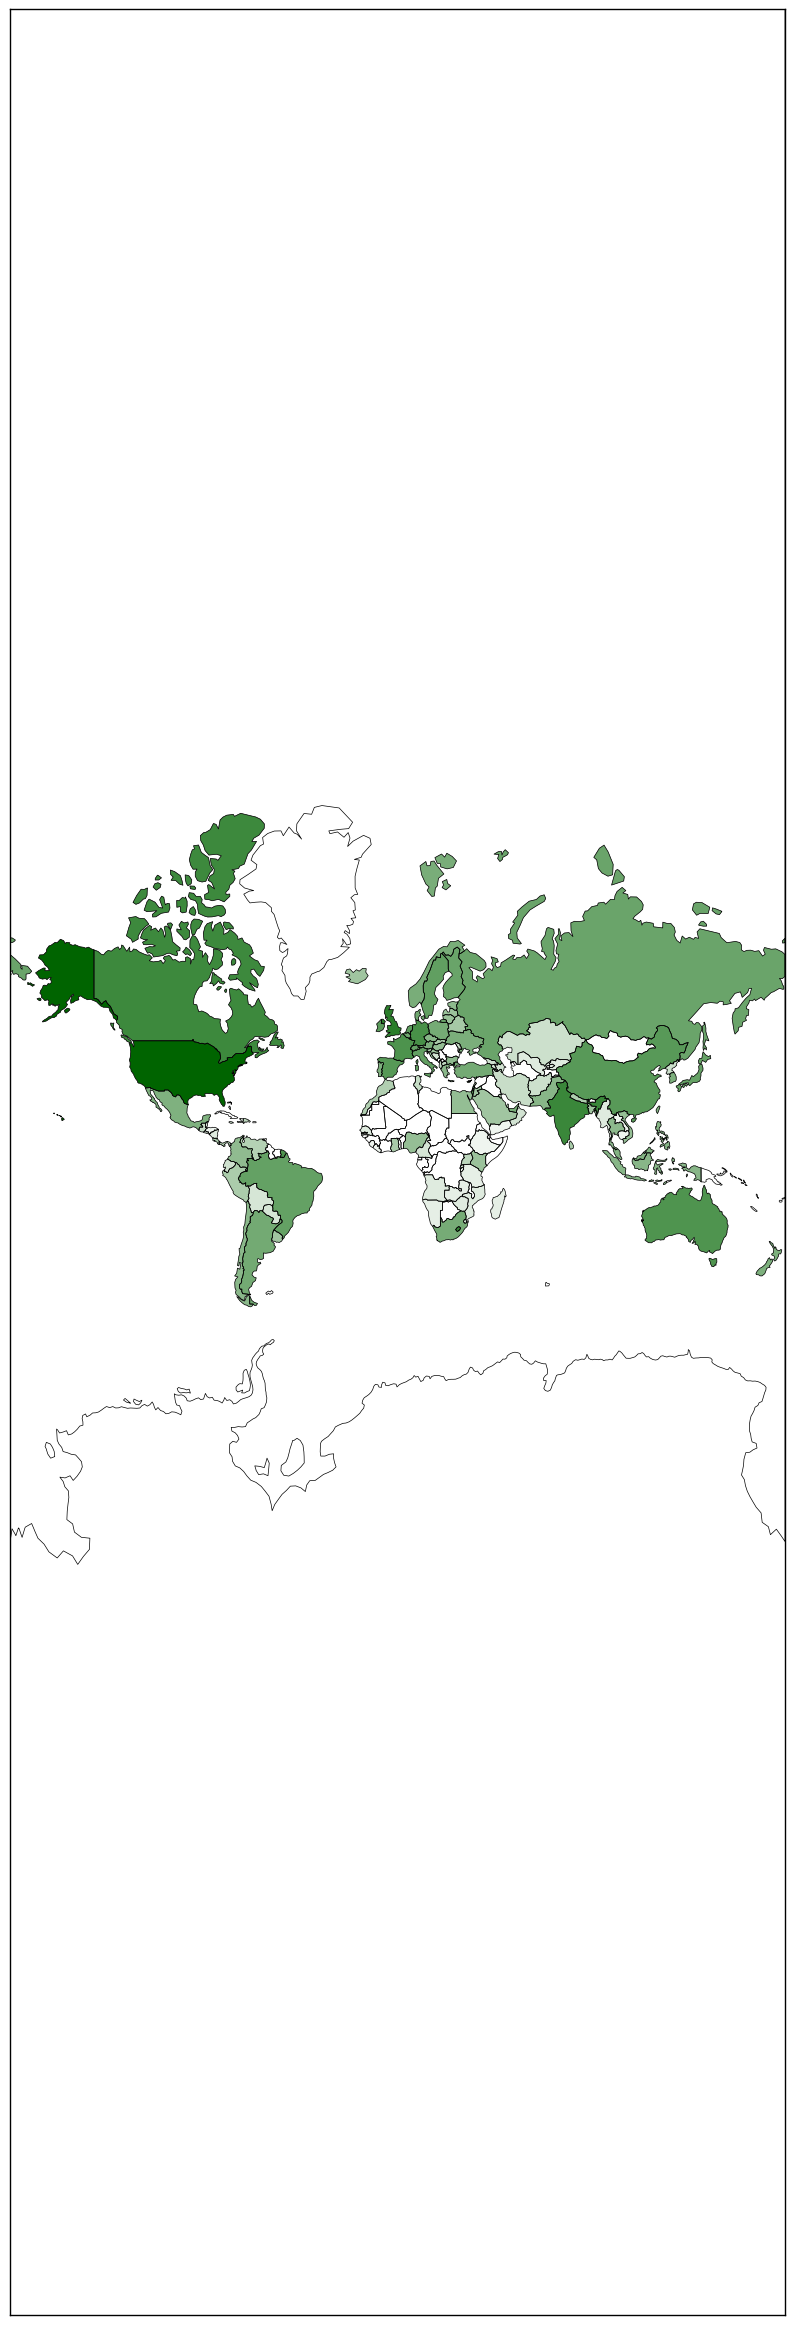

In [56]:
#create a data map (Question 1)
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Polygon
from descartes import PolygonPatch
import shapefile

import math
import sys
from IPython.display import display, HTML
#NumericData = data.select_dtypes(include=[np.number])
#NumericData.loc[:,'Country Name'] = data['Country Name']
#cols_to_norm = ['Literacy Rate (%)']
#NumericData[cols_to_norm] = NumericData[cols_to_norm].apply(lambda x: (x/ (x.max())))

fig = plt.figure()
ax = fig.add_subplot(111)

themap = Basemap(projection='merc' , resolution='i',fix_aspect='false')

state_patches = []
themap.readshapefile("/Users/ajasaxen/Documents/homeworks/dataScienceFundamentals/ne_110m_admin_0_countries/ne_110m_admin_0_countries",'countries')
for coordinates, state in zip(themap.countries, themap.countries_info):
    val = 0
    if("country" in  str(state["type"]) or "Country" in str(state["type"])):
        country =  state['gu_a3']
        count_val = df[df.country_code == country]['count']
        ary =  count_val.values
        if ary.size != 0:
            val = ary[0]
        #if(not name == '-99' and str(name) !='NA'):
        #    val = dict[name]
        state_patches.append(PolygonPatch(Polygon(coordinates), fc = "darkgreen", ec='#555555', lw=.2, alpha=val, zorder=4))

ax.add_collection(PatchCollection(state_patches, match_original=True))    
plt.gcf().set_size_inches(10,30)
plt.savefig('startup_distribution.png')

In [92]:
education_stats = pd.read_sql(' select * from education_stats ', con=db)

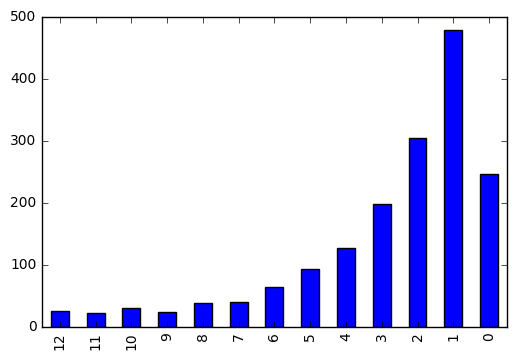

In [105]:
education_stats.sort_values(by=['yr'])['ct'].plot(kind='bar')

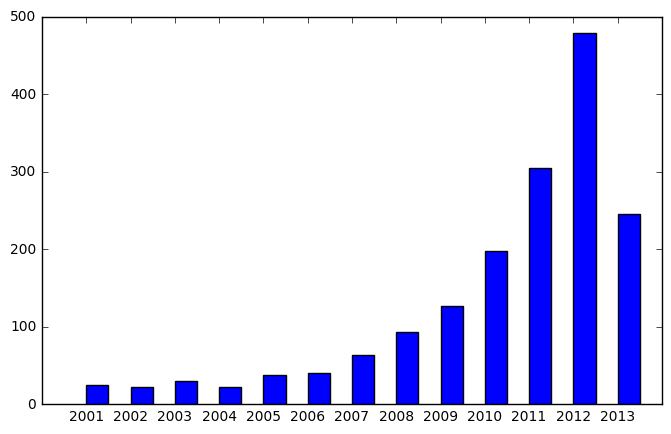

In [138]:
#education_stats.sort_values(by=['yr'])['ct'].plot(kind='bar')

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(education_stats.sort_values(by=['yr'])['yr'],education_stats.sort_values(by=['yr'])['ct'],width=0.5 )
plt.xticks(education_stats.sort_values(by=['yr'])['yr'])
plt.savefig('education_stats.png')

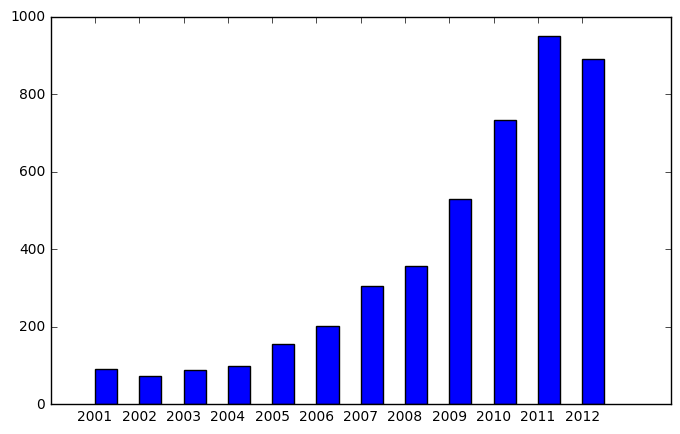

In [140]:
mobile_stats = pd.read_sql(' select * from mobile_stats ', con=db)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(mobile_stats.sort_values(by=['yr'])['yr'],mobile_stats.sort_values(by=['yr'])['ct'],width=0.5 )
plt.xticks(mobile_stats.sort_values(by=['yr'])['yr'])
plt.savefig('mobile_stats.png')

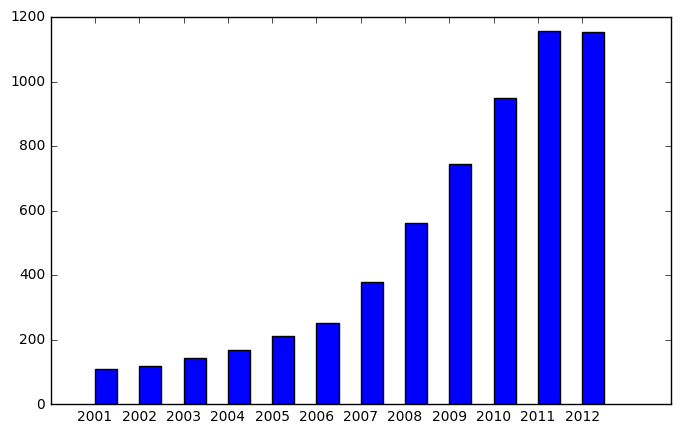

In [142]:
mobile_stats = pd.read_sql(' select * from ecommerce_stats ', con=db)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(mobile_stats.sort_values(by=['yr'])['yr'],mobile_stats.sort_values(by=['yr'])['ct'],width=0.5 )
plt.xticks(mobile_stats.sort_values(by=['yr'])['yr'])
plt.savefig('ecommerce_stats.png')

In [65]:
state_funding_data = pd.read_sql(' select * from funding_data_filtered_2 where yr is not null and yr > 1990 ', con=db)
#state_funding_data
state_funding_data['yr'] = state_funding_data['yr'].astype(int).astype(str)
#state_funding_data['sm'] = np.log(state_funding_data['sm'])

In [84]:
state_funding_data['sm'] = state_funding_data['sm'].divide(1000000000)

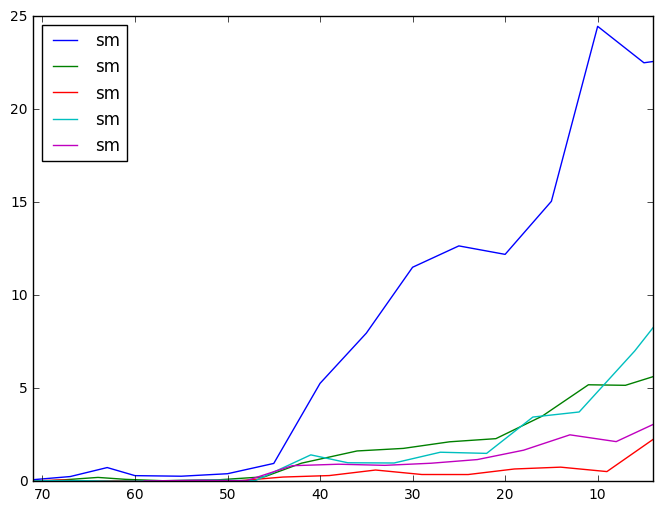

In [90]:
#state_funding_data['yr'] = pd.to_datetime(state_funding_data['yr'],format='%Y')
#plt.figure(figsize=(8,8))
#fig, ax = plt.subplots(1,1); 
#ax = plt.gca()
#data.groupby("template").plot(x="date", y="score", ax=ax)
#grouped_info = state_funding_data[['yr','sm','state_code']].sort_values(by=['yr','sm']).groupby("state_code")
#.plot(x='yr',y='sm',ax=ax)


fig, ax = plt.subplots(figsize=(8,6))
for label, df in state_funding_data.sort_values(by=['yr','sm']).groupby(["state_code"]):
    df.plot(kind="line", ax=ax, label=label)
plt.legend(loc=2)

In [70]:
state_funding_data[['yr','sm','state_code']].sort_values(by=['yr','sm']).groupby("state_code").count()

,yr,sm
state_code,,
CA,19,19
MA,16,16
MD,16,16
NY,17,17
TX,14,13
